# Welcome to this incredible analysis
In these trying times, we are all seeking to find solace in each other's company. Where we used to mingle and dance very close to each other, we now release steam through virtual gatherings using platforms like Zoom or Gather Town. In this notebook, we seek to compare scores on the peer-assessed rowdiness total (Y edition) (partY score) measured last December 2019 during the holidays to those measured this May 2020 at the virtual social gathering in Gather Town for MTL BrainHackSchool2020.



Let's start by loading the data and importing packages.

In [13]:
import pandas as pd 
import numpy as np 
from scipy import stats
%matplotlib inline

In [14]:
csv = 'data/brainsize.csv'
data = pd.read_csv(csv, sep=';', index_col=0, na_values=".") # Missing values are ID'd as such.
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


Let's generate our variable of interest: partY

In [38]:
# This cell is commented out so it isn't run with the rest. This cell generated the partY, partY2 and per_partY datasets.

#### What is the number of rows?
#rows = data.shape[0]
#### Generate the data
#partY = np.random.rand(rows, 1) #The partY score in December 2019
#partY2 = np.random.rand(rows, 1) #The validator dataset.
#pan_partY = np.random.rand(rows, 1) #The partY score in May 2020
#### Save the data to .txt file
#partY = partY.tolist()
#partY2 = partY2.tolist()
#pan_partY = pan_partY.tolist()
#
#with open('data/partY.txt', 'w') as fhandle:
#    for x in partY:
#       fhandle.write('%s\n' % x)
#
#with open('data/partY2.txt', 'w') as fhandle:
#    for x in partY2:
#        fhandle.write('%s\n' % x)
#
#with open('data/pan_partY.txt', 'w') as fhandle:
#    for x in pan_partY:
#        fhandle.write('%s\n' % x)

Now that the variable of interest is saved to file, let's add it to the dataframe!

In [15]:
# Read variables from file, clean up and add to df.
partY = []
partY2 = []
pan_partY = []

with open('data/partY.txt', 'r') as fhandle:
    for line in fhandle:
        line = line.replace("]\n", "") # Remove superfluous characters
        line = line.replace("[", "")
        partY.append(line)
partY = np.asarray(partY, dtype = float, order = None)
data['partY'] = partY

with open('data/partY2.txt', 'r') as fhandle:
    for line in fhandle:
        line = line.replace("]\n", "") # Remove superfluous characters
        line = line.replace("[", "")
        partY2.append(line)
partY2 = np.asarray(partY2, dtype = float, order = None)
data['partY2'] = partY2

with open('data/pan_partY.txt', 'r') as fhandle:
    for line in fhandle:
        line = line.replace("]\n", "") # Remove superfluous characters
        line = line.replace("[", "")
        pan_partY.append(line)
pan_partY = np.asarray(pan_partY, dtype = float, order = None)
data['pan_partY'] = pan_partY

# Make sure Gender is categorical.
data['Gender'].astype('category')

data_desc = data.describe() # For easy VS Code checking
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2,pan_partY
1,Female,133,132,124,118.0,64.5,816932,0.227756,0.600675,0.819886
2,Male,140,150,124,NaN,72.5,1001121,0.487362,0.620723,0.022743
3,Male,139,123,150,143.0,73.3,1038437,0.132167,0.088906,0.492700
4,Male,133,129,128,172.0,68.8,965353,0.366157,0.189271,0.905456
5,Female,137,132,134,147.0,65.0,951545,0.304653,0.953413,0.462003


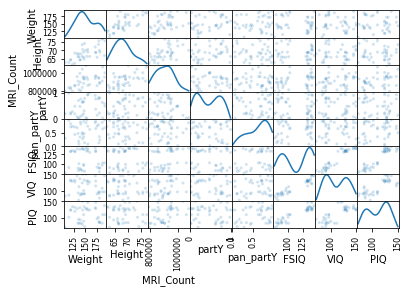

In [16]:
# Check out the data
from pandas import plotting as pdplt
pdplt.scatter_matrix(data[['Weight', 'Height', 'MRI_Count', 'partY', 'pan_partY', 'FSIQ', 'VIQ', 'PIQ']], alpha=0.2, diagonal='kde');

It seems the distributions of the partY scores are different.

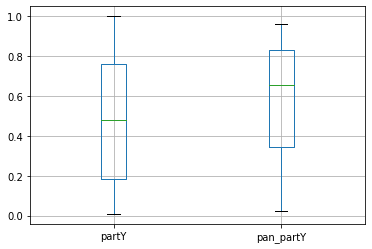

In [17]:
data.boxplot(column=['partY', 'pan_partY'])

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

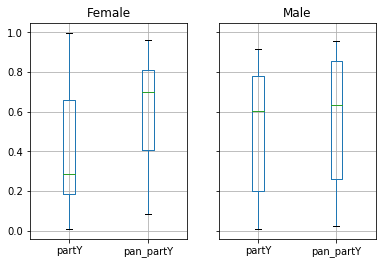

In [18]:
data.groupby(['Gender']).boxplot(column=['partY', 'pan_partY'])